### 在欧几里得空间和双曲空间中绘制散点分布

In [ ]:
import torch

inputs_embeds = torch.load("./embeddings/inputs_embeds.pt")
image_features = torch.load("./embeddings/image_features.pt")
inputs_embeds.shape, image_features.shape

(torch.Size([8, 1, 4096]), torch.Size([8, 576, 4096]))

In [4]:
inputs_embeds_mean = inputs_embeds.mean(dim=1)
image_features_mean = image_features.mean(dim=1)
inputs_embeds_mean.shape, image_features_mean.shape

(torch.Size([64, 4096]), torch.Size([64, 4096]))

/home/lsy/anaconda3/envs/meru/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


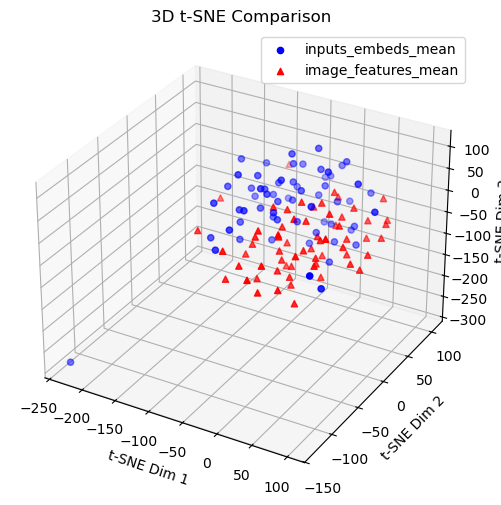

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

# 转成 float32 再转 numpy
X1 = inputs_embeds_mean.detach().cpu().to(torch.float32).numpy()
X2 = image_features_mean.detach().cpu().to(torch.float32).numpy()

# 拼接在一起做 t-SNE，保证降维空间一致
X = np.vstack([X1, X2])

tsne = TSNE(n_components=3, random_state=42, perplexity=20, n_iter=1000)
X_3d = tsne.fit_transform(X)

# 分开结果
X1_3d = X_3d[:len(X1)]
X2_3d = X_3d[len(X1):]

# 绘制
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(X1_3d[:, 0], X1_3d[:, 1], X1_3d[:, 2],
           c="blue", marker="o", label="inputs_embeds_mean")
ax.scatter(X2_3d[:, 0], X2_3d[:, 1], X2_3d[:, 2],
           c="red", marker="^", label="image_features_mean")

ax.set_xlabel("t-SNE Dim 1")
ax.set_ylabel("t-SNE Dim 2")
ax.set_zlabel("t-SNE Dim 3")
plt.title("3D t-SNE Comparison")
ax.legend()
plt.show()


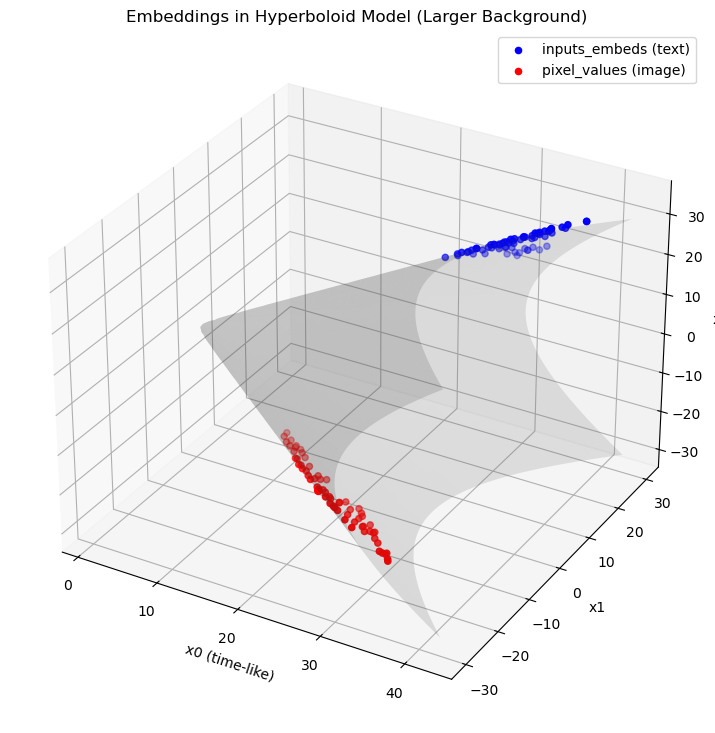

In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 1. 将张量转为 numpy
X1 = inputs_embeds_mean.to(torch.float32).cpu().numpy()  # [64, 4096]
X2 = image_features_mean.to(torch.float32).cpu().numpy()  # [64, 4096]

# 拼接（方便降维）
X = np.vstack([X1, X2])  # [128, 4096]

# 2. 用 t-SNE 降维到 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=15, learning_rate=200)
X_2d = tsne.fit_transform(X)  # [128, 2]

# 3. 映射到双曲二次曲面
def to_hyperboloid(points_2d):
    u, v = points_2d[:, 0], points_2d[:, 1]
    x0 = np.sqrt(1.0 + u**2 + v**2)
    return np.stack([x0, u, v], axis=1)

X_hyp = to_hyperboloid(X_2d)  # [128, 3]

# 前 64 是 inputs_embeds，后 64 是 pixel_values
X1_hyp, X2_hyp = X_hyp[:64], X_hyp[64:]

# 4. 绘制更大的双曲二次曲面背景
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# 双曲面背景范围
u = np.linspace(-30, 30, 200)
v = np.linspace(-30, 30, 200)
U, V = np.meshgrid(u, v)
X0 = np.sqrt(1 + U**2 + V**2)

# 绘制曲面（加大面积，透明度降低一些）
ax.plot_surface(X0, U, V, alpha=0.15, color='gray', linewidth=0, antialiased=True)

# 绘制散点
ax.scatter(X1_hyp[:, 0], X1_hyp[:, 1], X1_hyp[:, 2], 
           c='blue', label='inputs_embeds (text)')
ax.scatter(X2_hyp[:, 0], X2_hyp[:, 1], X2_hyp[:, 2], 
           c='red', label='pixel_values (image)')

ax.set_xlabel("x0 (time-like)")
ax.set_ylabel("x1")
ax.set_zlabel("x2")
ax.set_title("Embeddings in Hyperboloid Model (Larger Background)")
ax.legend()

plt.show()


### Llava-1.6-mistral-hf

#### HateSpeech SD

In [1]:
import torch

layer_0 = torch.load("./embeddings/HateSpeech/SD/layer_0.pt").to(torch.float32).cpu()
layer_8 = torch.load("./embeddings/HateSpeech/SD/layer_8.pt").to(torch.float32).cpu()
layer_16 = torch.load("./embeddings/HateSpeech/SD/layer_16.pt").to(torch.float32).cpu()
layer_24 = torch.load("./embeddings/HateSpeech/SD/layer_24.pt").to(torch.float32).cpu()
layer_32 = torch.load("./embeddings/HateSpeech/SD/layer_32.pt").to(torch.float32).cpu()

balanced_indices = torch.load("./embeddings/HateSpeech/SD/balanced_indices.pt")

# 使用 balanced_indices 选择子集
layer_0 = layer_0[balanced_indices]
layer_8 = layer_8[balanced_indices]
layer_16 = layer_16[balanced_indices]
layer_24 = layer_24[balanced_indices]
layer_32 = layer_32[balanced_indices]

layer_0.shape, layer_8.shape, layer_16.shape, layer_24.shape, layer_32.shape


: 

In [2]:
layer_0_mean = layer_0.mean(dim=1)
layer_8_mean = layer_8.mean(dim=1)
layer_16_mean = layer_16.mean(dim=1)
layer_24_mean = layer_24.mean(dim=1)
layer_32_mean = layer_32.mean(dim=1)


##### 欧几里得空间

/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  

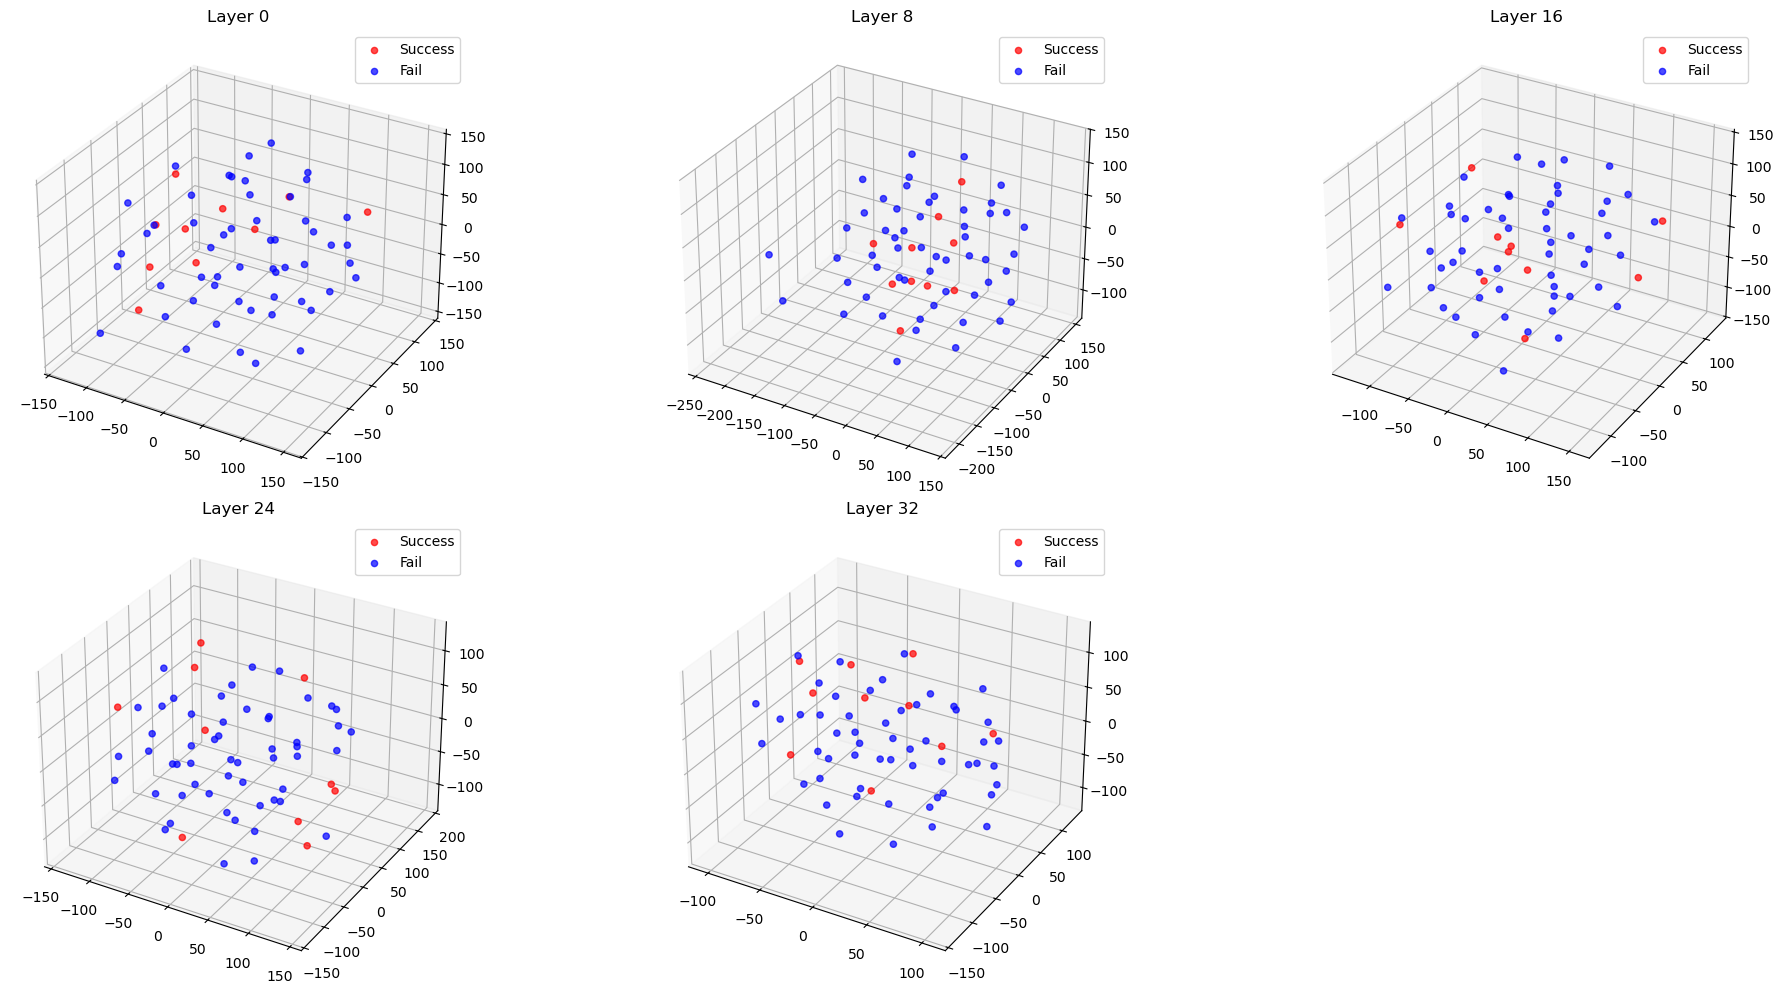

In [3]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D  # 注册 3D 投影

layers = {
    "Layer 0": layer_0_mean,
    "Layer 8": layer_8_mean,
    "Layer 16": layer_16_mean,
    "Layer 24": layer_24_mean,
    "Layer 32": layer_32_mean
}

# 绘制子图
fig = plt.figure(figsize=(20, 10))

for i, (layer_name, layer_tensor) in enumerate(layers.items(), 1):
    # t-SNE 降维到 3D
    tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
    layer_embedded = tsne.fit_transform(layer_tensor.cpu().to(torch.float32).numpy())

    # 3D 子图
    ax = fig.add_subplot(2, 3, i, projection="3d")
    
    # 绘制散点：红色=攻击成功，蓝色=攻击失败
    ax.scatter(
        layer_embedded[attack_results == 1, 0],
        layer_embedded[attack_results == 1, 1],
        layer_embedded[attack_results == 1, 2],
        c="red", label="Success", alpha=0.7, marker="o"
    )
    ax.scatter(
        layer_embedded[attack_results == 0, 0],
        layer_embedded[attack_results == 0, 1],
        layer_embedded[attack_results == 0, 2],
        c="blue", label="Fail", alpha=0.7, marker="o"
    )
    
    ax.set_title(layer_name)
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
import torch
from sklearn.manifold import TSNE
import plotly.graph_objects as go

# 五个 layer 的张量
layers = {
    "Layer 0": layer_0_mean.to(torch.float32),
    "Layer 8": layer_8_mean.to(torch.float32),
    "Layer 16": layer_16_mean.to(torch.float32),
    "Layer 24": layer_24_mean.to(torch.float32),
    "Layer 32": layer_32_mean.to(torch.float32)
}

fig = go.Figure()

for layer_name, layer_tensor in layers.items():
    # t-SNE 降维到 3D
    tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
    layer_embedded = tsne.fit_transform(layer_tensor.cpu().to(torch.float32).numpy())

    # 攻击成功 (红色)
    fig.add_trace(go.Scatter3d(
        x=layer_embedded[attack_results == 1, 0],
        y=layer_embedded[attack_results == 1, 1],
        z=layer_embedded[attack_results == 1, 2],
        mode="markers",
        marker=dict(size=4, color="red"),
        name=f"{layer_name} - Success"
    ))

    # 攻击失败 (蓝色)
    fig.add_trace(go.Scatter3d(
        x=layer_embedded[attack_results == 0, 0],
        y=layer_embedded[attack_results == 0, 1],
        z=layer_embedded[attack_results == 0, 2],
        mode="markers",
        marker=dict(size=4, color="blue"),
        name=f"{layer_name} - Fail"
    ))

fig.update_layout(
    scene=dict(
        xaxis_title="Dim 1",
        yaxis_title="Dim 2",
        zaxis_title="Dim 3"
    ),
    title="t-SNE of Different Layers (Interactive 3D)",
    legend=dict(itemsizing="constant")
)

fig.show()


##### 双曲空间中

/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  

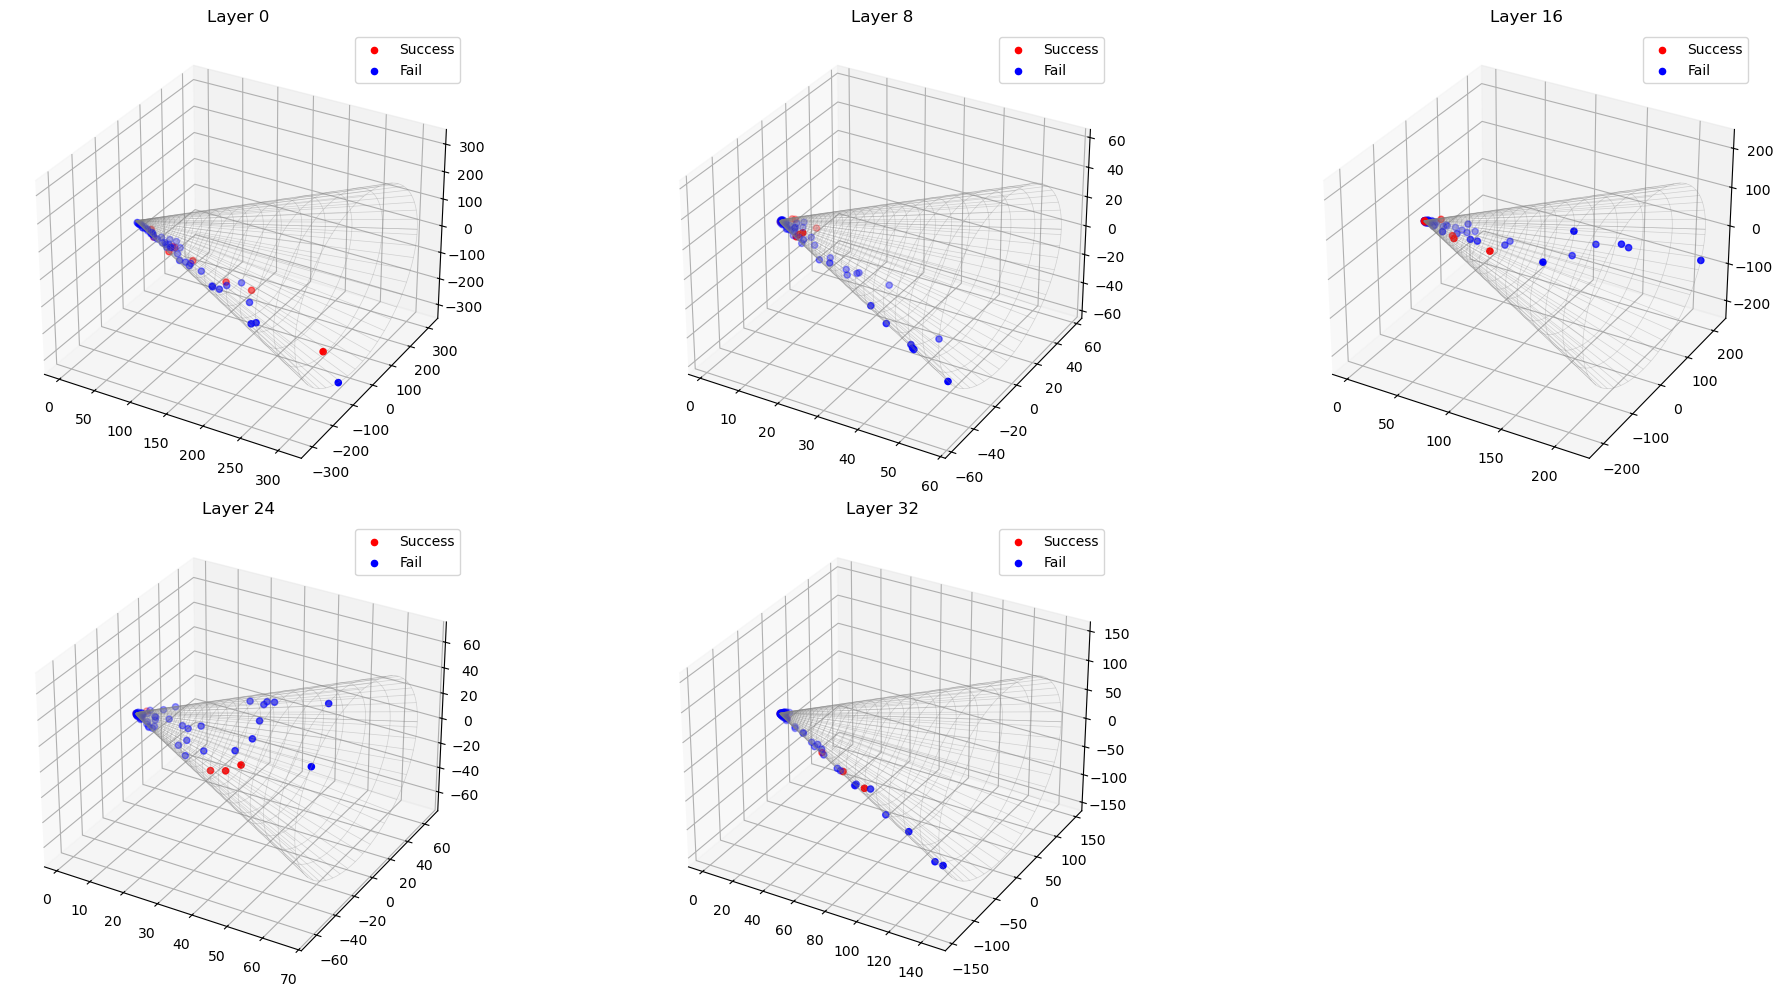

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# exp map from R^2 -> H^2 ⊂ R^3
def exp_map_hyperboloid(v, kappa=1.0):
    r = np.linalg.norm(v, axis=1, keepdims=True)
    r = np.clip(r, 1e-8, None)
    x0 = np.cosh(np.sqrt(kappa) * r)
    xy = np.sinh(np.sqrt(kappa) * r) * v / (np.sqrt(kappa) * r)
    return np.concatenate([x0, xy], axis=1)  # [N,3]


# 绘制双曲面网格
def plot_hyperboloid_mesh(ax, r_max, n_r=50, n_theta=100, wireframe=True):
    r = np.linspace(0, r_max, n_r)
    theta = np.linspace(0, 2*np.pi, n_theta)
    R, Theta = np.meshgrid(r, theta)

    X0 = np.cosh(R)
    X1 = np.sinh(R) * np.cos(Theta)
    X2 = np.sinh(R) * np.sin(Theta)

    if wireframe:
        ax.plot_wireframe(X0, X1, X2, color="gray", alpha=0.3, linewidth=0.5)
    else:
        ax.plot_surface(X0, X1, X2, alpha=0.05, color="gray", linewidth=0, antialiased=False)



# 五个层的数据
layers = {
    "Layer 0": layer_0_mean.to(torch.float32),
    "Layer 8": layer_8_mean.to(torch.float32),
    "Layer 16": layer_16_mean.to(torch.float32),
    "Layer 24": layer_24_mean.to(torch.float32),
    "Layer 32": layer_32_mean.to(torch.float32)
}

fig = plt.figure(figsize=(20, 10))

for i, (layer_name, layer_tensor) in enumerate(layers.items(), 1):
    # t-SNE 降到 2D
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
    layer_embedded = tsne.fit_transform(layer_tensor.cpu().numpy())

    # exp map 到双曲面
    hyperbolic_coords = exp_map_hyperboloid(layer_embedded, kappa=1.0)

    # 动态确定曲面范围
    r_max = np.max(np.linalg.norm(layer_embedded, axis=1)) * 1.0

    ax = fig.add_subplot(2, 3, i, projection="3d")

    # 画大双曲面网格
    plot_hyperboloid_mesh(ax, r_max=r_max, wireframe=True)

    # 攻击成功 (红色圆点)
    ax.scatter(
        hyperbolic_coords[attack_results==1, 0],
        hyperbolic_coords[attack_results==1, 1],
        hyperbolic_coords[attack_results==1, 2],
        c="red", marker="o", label="Success"
    )

    # 攻击失败 (蓝色圆点)
    ax.scatter(
        hyperbolic_coords[attack_results==0, 0],
        hyperbolic_coords[attack_results==0, 1],
        hyperbolic_coords[attack_results==0, 2],
        c="blue", marker="o", label="Fail"
    )

    ax.set_title(layer_name)
    ax.legend()

plt.tight_layout()
plt.show()


##### 4096维双曲空间上与原点的洛伦兹距离

In [ ]:
import utils.lorentz
from utils.lorentz import exp_map0, elementwise_dist

# 逐层映射到双曲空间（只传空间维度）
layer_0_hyp  = exp_map0(layer_0_mean,  curv=1.0)
layer_8_hyp  = exp_map0(layer_8_mean,  curv=1.0)
layer_16_hyp = exp_map0(layer_16_mean, curv=1.0)
layer_24_hyp = exp_map0(layer_24_mean, curv=1.0)
layer_32_hyp = exp_map0(layer_32_mean, curv=1.0)

curv = 1.0
B, D = layer_0_hyp.shape  # D = 4096

# 构造原点 O（全零空间向量）
O = torch.zeros(D, device=layer_0_hyp.device, dtype=layer_0_hyp.dtype)
O = O.unsqueeze(0).expand(B, -1)  # [B, D]

# 分别计算每层到原点的距离
dist_0  = elementwise_dist(layer_0_hyp,  O, curv=curv)  # [B]
dist_8  = elementwise_dist(layer_8_hyp,  O, curv=curv)
dist_16 = elementwise_dist(layer_16_hyp, O, curv=curv)
dist_24 = elementwise_dist(layer_24_hyp, O, curv=curv)
dist_32 = elementwise_dist(layer_32_hyp, O, curv=curv)


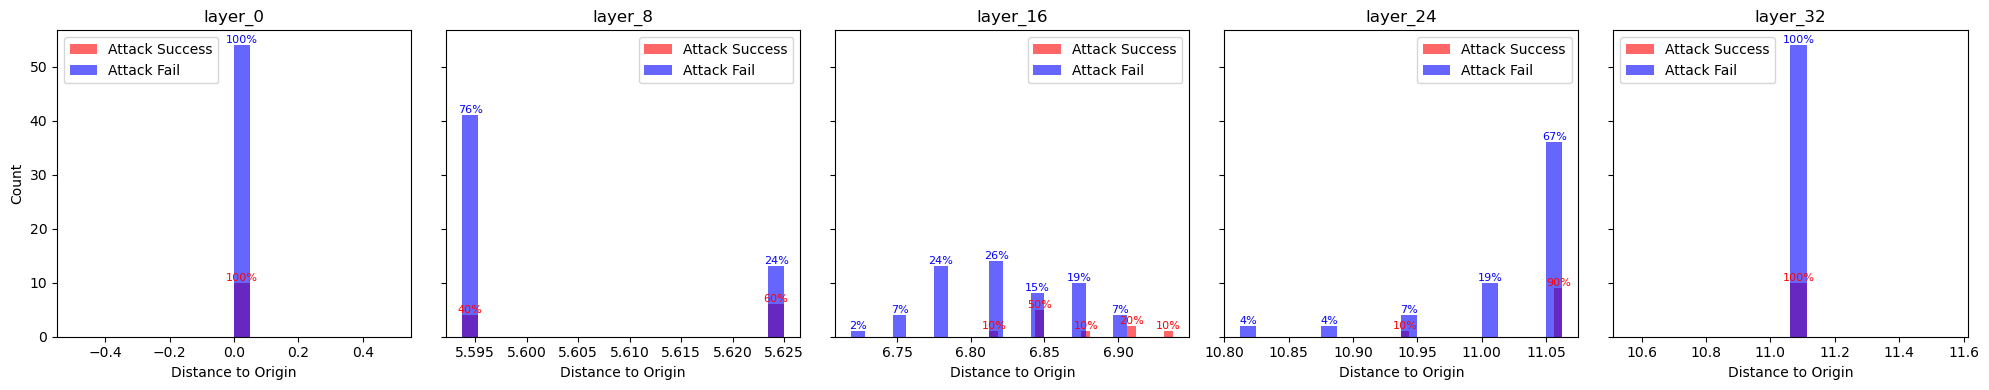

In [7]:
import matplotlib.pyplot as plt
import torch

layers = {
    "layer_0": dist_0,
    "layer_8": dist_8,
    "layer_16": dist_16,
    "layer_24": dist_24,
    "layer_32": dist_32,
}

num_layers = len(layers)
fig, axes = plt.subplots(1, num_layers, figsize=(20, 4), sharey=True)

# 转换为 float32
attack_mask = attack_results.to(torch.bool)

for i, (layer_name, dist) in enumerate(layers.items()):
    ax = axes[i]
    dist = dist.to(torch.float)

    # 分组
    dist_success = dist[attack_mask].cpu()
    dist_fail    = dist[~attack_mask].cpu()

    # 绘制直方图并获取条形对象
    bins = 20
    counts_succ, bins_succ, patches_succ = ax.hist(dist_success, bins=bins, 
                                                   color="red", alpha=0.6, label="Attack Success")
    counts_fail, bins_fail, patches_fail = ax.hist(dist_fail, bins=bins, 
                                                   color="blue", alpha=0.6, label="Attack Fail")

    # 转换为百分比
    perc_succ = counts_succ / counts_succ.sum() * 100
    perc_fail = counts_fail / counts_fail.sum() * 100

    # 在每个 bin 上显示百分比
    for count, patch, perc in zip(counts_succ, patches_succ, perc_succ):
        if count > 0:
            ax.text(patch.get_x() + patch.get_width()/2, count, f"{perc:.0f}%", 
                    ha="center", va="bottom", fontsize=8, color="red")
    for count, patch, perc in zip(counts_fail, patches_fail, perc_fail):
        if count > 0:
            ax.text(patch.get_x() + patch.get_width()/2, count, f"{perc:.0f}%", 
                    ha="center", va="bottom", fontsize=8, color="blue")

    ax.set_title(layer_name)
    ax.set_xlabel("Distance to Origin")
    if i == 0:
        ax.set_ylabel("Count")
    ax.legend()

plt.tight_layout()
plt.show()


#### SD

##### 欧几里得空间

In [1]:
import torch

layer_0 = torch.load("./embeddings/SD_Hate/layer_0.pt")
layer_8 = torch.load("./embeddings/SD_Hate/layer_8.pt")
layer_16 = torch.load("./embeddings/SD_Hate/layer_16.pt")
layer_24 = torch.load("./embeddings/SD_Hate/layer_24.pt")
layer_32 = torch.load("./embeddings/SD_Hate/layer_32.pt")
attack_results = torch.load("./embeddings/SD_Hate/label.pt")

layer_0.shape, layer_8.shape, layer_16.shape, layer_24.shape, layer_32.shape, attack_results.shape


(torch.Size([64, 3063, 4096]),
 torch.Size([64, 3063, 4096]),
 torch.Size([64, 3063, 4096]),
 torch.Size([64, 3063, 4096]),
 torch.Size([64, 3063, 4096]),
 torch.Size([64]))

In [2]:
layer_0_mean = layer_0.mean(dim=1)
layer_8_mean = layer_8.mean(dim=1)
layer_16_mean = layer_16.mean(dim=1)
layer_24_mean = layer_24.mean(dim=1)
layer_32_mean = layer_32.mean(dim=1)

/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  

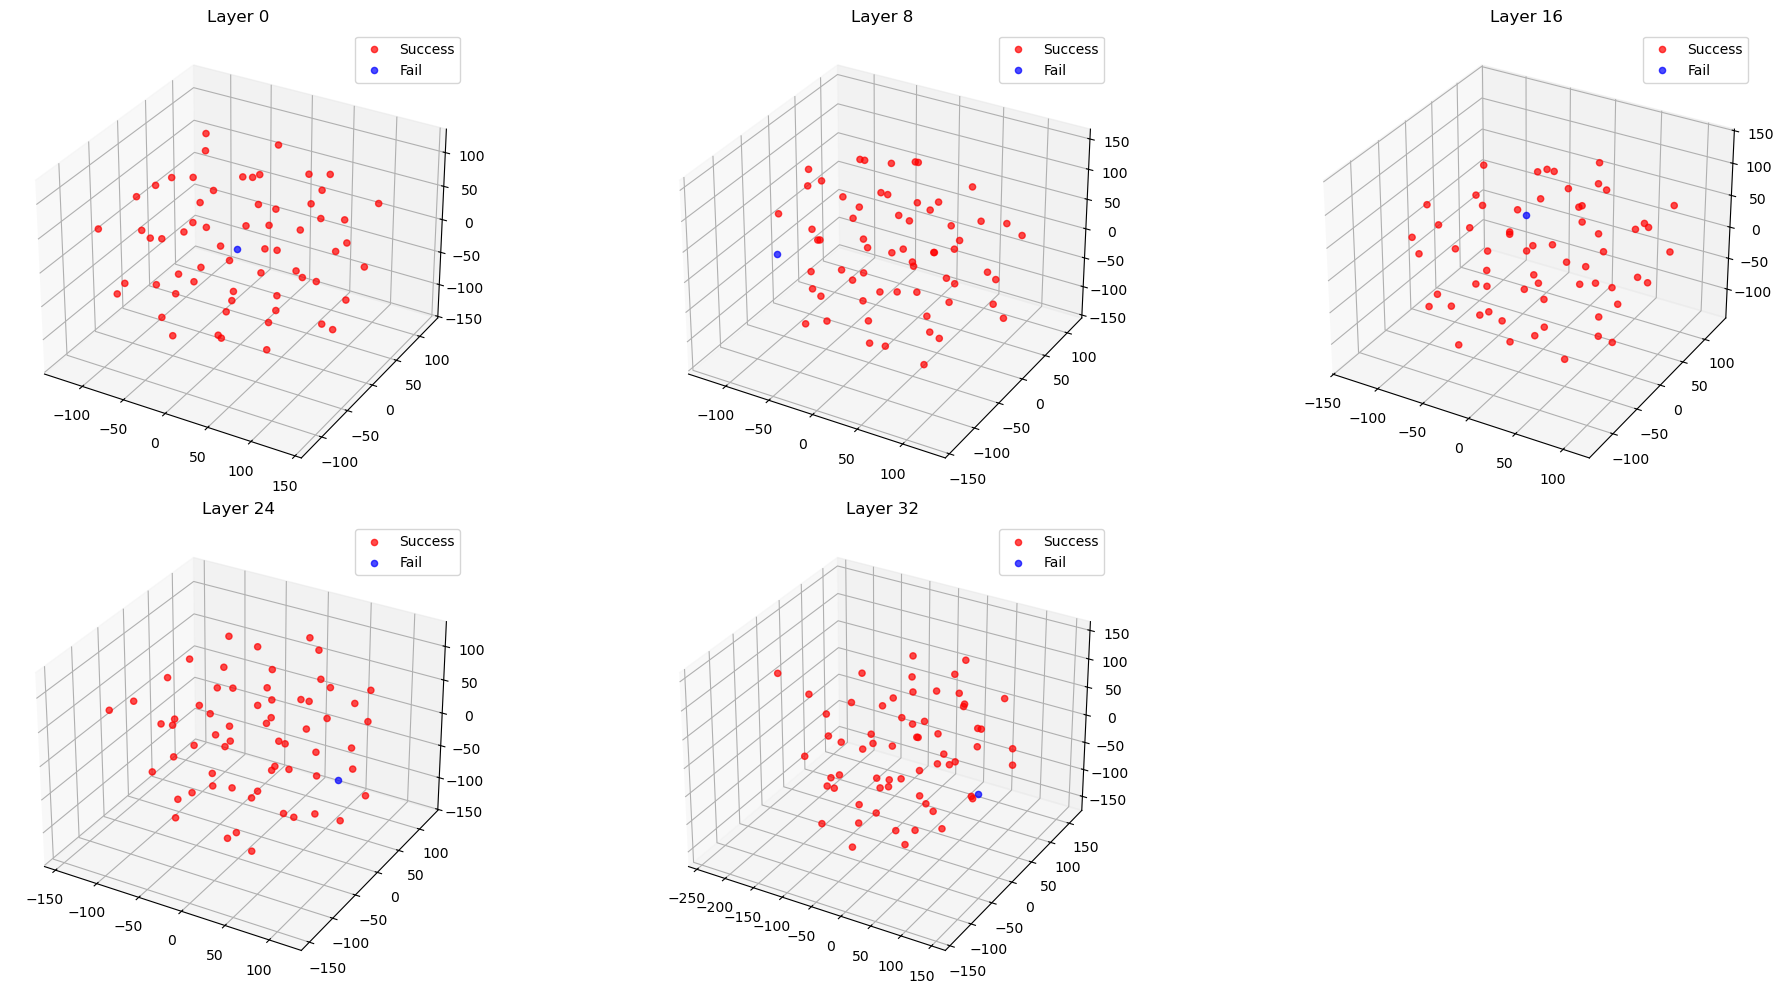

In [3]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D  # 注册 3D 投影

layers = {
    "Layer 0": layer_0_mean,
    "Layer 8": layer_8_mean,
    "Layer 16": layer_16_mean,
    "Layer 24": layer_24_mean,
    "Layer 32": layer_32_mean
}

# 绘制子图
fig = plt.figure(figsize=(20, 10))

for i, (layer_name, layer_tensor) in enumerate(layers.items(), 1):
    # t-SNE 降维到 3D
    tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
    layer_embedded = tsne.fit_transform(layer_tensor.cpu().to(torch.float32).numpy())

    # 3D 子图
    ax = fig.add_subplot(2, 3, i, projection="3d")
    
    # 绘制散点：红色=攻击成功，蓝色=攻击失败
    ax.scatter(
        layer_embedded[attack_results == 1, 0],
        layer_embedded[attack_results == 1, 1],
        layer_embedded[attack_results == 1, 2],
        c="red", label="Success", alpha=0.7, marker="o"
    )
    ax.scatter(
        layer_embedded[attack_results == 0, 0],
        layer_embedded[attack_results == 0, 1],
        layer_embedded[attack_results == 0, 2],
        c="blue", label="Fail", alpha=0.7, marker="o"
    )
    
    ax.set_title(layer_name)
    ax.legend()

plt.tight_layout()
plt.show()

##### 双曲空间

/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/lsy/anaconda3/envs/hysac/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  

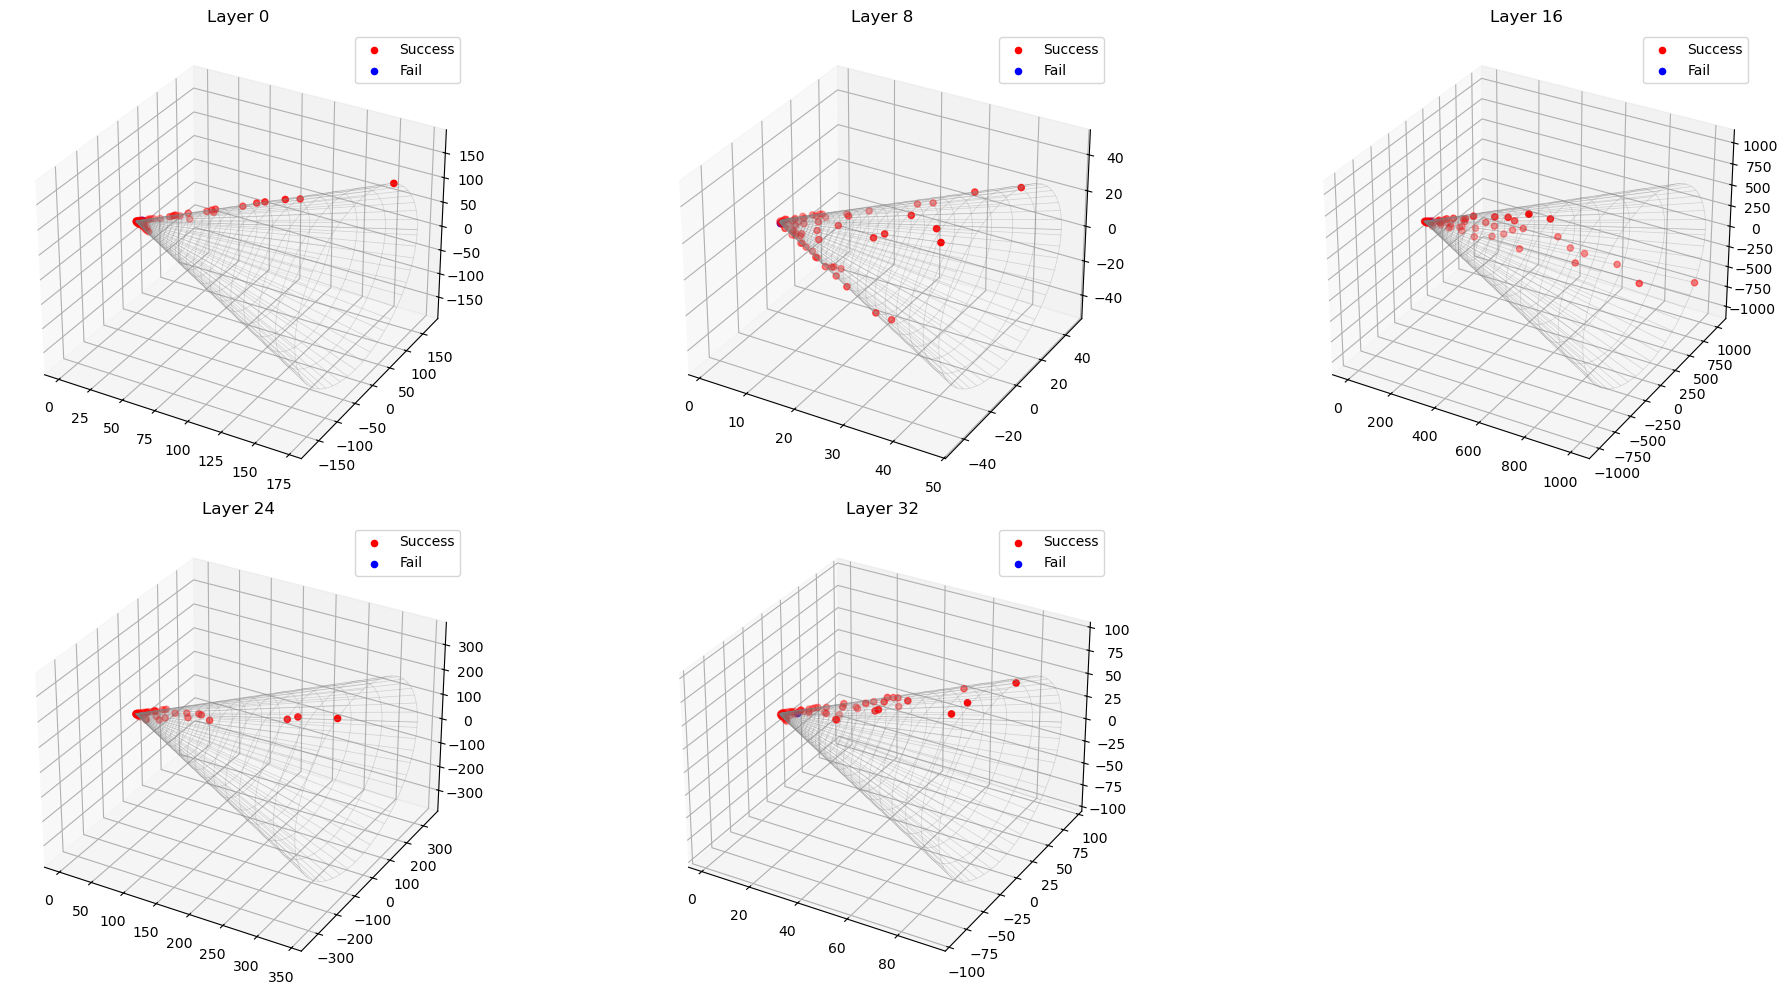

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# exp map from R^2 -> H^2 ⊂ R^3
def exp_map_hyperboloid(v, kappa=1.0):
    r = np.linalg.norm(v, axis=1, keepdims=True)
    r = np.clip(r, 1e-8, None)
    x0 = np.cosh(np.sqrt(kappa) * r)
    xy = np.sinh(np.sqrt(kappa) * r) * v / (np.sqrt(kappa) * r)
    return np.concatenate([x0, xy], axis=1)  # [N,3]


# 绘制双曲面网格
def plot_hyperboloid_mesh(ax, r_max, n_r=50, n_theta=100, wireframe=True):
    r = np.linspace(0, r_max, n_r)
    theta = np.linspace(0, 2*np.pi, n_theta)
    R, Theta = np.meshgrid(r, theta)

    X0 = np.cosh(R)
    X1 = np.sinh(R) * np.cos(Theta)
    X2 = np.sinh(R) * np.sin(Theta)

    if wireframe:
        ax.plot_wireframe(X0, X1, X2, color="gray", alpha=0.3, linewidth=0.5)
    else:
        ax.plot_surface(X0, X1, X2, alpha=0.05, color="gray", linewidth=0, antialiased=False)



# 五个层的数据
layers = {
    "Layer 0": layer_0_mean.to(torch.float32),
    "Layer 8": layer_8_mean.to(torch.float32),
    "Layer 16": layer_16_mean.to(torch.float32),
    "Layer 24": layer_24_mean.to(torch.float32),
    "Layer 32": layer_32_mean.to(torch.float32)
}

fig = plt.figure(figsize=(20, 10))

for i, (layer_name, layer_tensor) in enumerate(layers.items(), 1):
    # t-SNE 降到 2D
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
    layer_embedded = tsne.fit_transform(layer_tensor.cpu().numpy())

    # exp map 到双曲面
    hyperbolic_coords = exp_map_hyperboloid(layer_embedded, kappa=1.0)

    # 动态确定曲面范围
    r_max = np.max(np.linalg.norm(layer_embedded, axis=1)) * 1.0

    ax = fig.add_subplot(2, 3, i, projection="3d")

    # 画大双曲面网格
    plot_hyperboloid_mesh(ax, r_max=r_max, wireframe=True)

    # 攻击成功 (红色圆点)
    ax.scatter(
        hyperbolic_coords[attack_results==1, 0],
        hyperbolic_coords[attack_results==1, 1],
        hyperbolic_coords[attack_results==1, 2],
        c="red", marker="o", label="Success"
    )

    # 攻击失败 (蓝色圆点)
    ax.scatter(
        hyperbolic_coords[attack_results==0, 0],
        hyperbolic_coords[attack_results==0, 1],
        hyperbolic_coords[attack_results==0, 2],
        c="blue", marker="o", label="Fail"
    )

    ax.set_title(layer_name)
    ax.legend()

plt.tight_layout()
plt.show()


##### 4096维双曲空间上与原点的洛伦兹距离

In [5]:
import utils.lorentz
from utils.lorentz import exp_map0, elementwise_dist

# 逐层映射到双曲空间（只传空间维度）
layer_0_hyp  = exp_map0(layer_0_mean,  curv=1.0)
layer_8_hyp  = exp_map0(layer_8_mean,  curv=1.0)
layer_16_hyp = exp_map0(layer_16_mean, curv=1.0)
layer_24_hyp = exp_map0(layer_24_mean, curv=1.0)
layer_32_hyp = exp_map0(layer_32_mean, curv=1.0)

curv = 1.0
B, D = layer_0_hyp.shape  # D = 4096

# 构造原点 O（全零空间向量）
O = torch.zeros(D, device=layer_0_hyp.device, dtype=layer_0_hyp.dtype)
O = O.unsqueeze(0).expand(B, -1)  # [B, D]

# 分别计算每层到原点的距离
dist_0  = elementwise_dist(layer_0_hyp,  O, curv=curv)  # [B]
dist_8  = elementwise_dist(layer_8_hyp,  O, curv=curv)
dist_16 = elementwise_dist(layer_16_hyp, O, curv=curv)
dist_24 = elementwise_dist(layer_24_hyp, O, curv=curv)
dist_32 = elementwise_dist(layer_32_hyp, O, curv=curv)


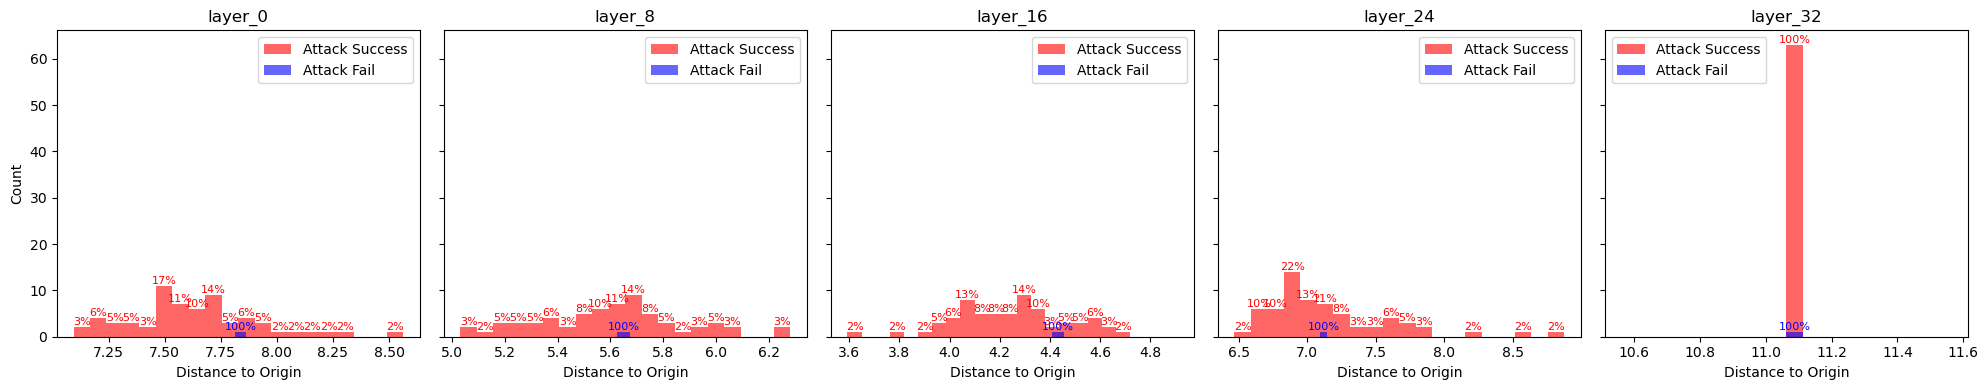

In [6]:
import matplotlib.pyplot as plt
import torch

layers = {
    "layer_0": dist_0,
    "layer_8": dist_8,
    "layer_16": dist_16,
    "layer_24": dist_24,
    "layer_32": dist_32,
}

num_layers = len(layers)
fig, axes = plt.subplots(1, num_layers, figsize=(20, 4), sharey=True)

# 转换为 float32
attack_mask = attack_results.to(torch.bool)

for i, (layer_name, dist) in enumerate(layers.items()):
    ax = axes[i]
    dist = dist.to(torch.float)

    # 分组
    dist_success = dist[attack_mask].cpu()
    dist_fail    = dist[~attack_mask].cpu()

    # 绘制直方图并获取条形对象
    bins = 20
    counts_succ, bins_succ, patches_succ = ax.hist(dist_success, bins=bins, 
                                                   color="red", alpha=0.6, label="Attack Success")
    counts_fail, bins_fail, patches_fail = ax.hist(dist_fail, bins=bins, 
                                                   color="blue", alpha=0.6, label="Attack Fail")

    # 转换为百分比
    perc_succ = counts_succ / counts_succ.sum() * 100
    perc_fail = counts_fail / counts_fail.sum() * 100

    # 在每个 bin 上显示百分比
    for count, patch, perc in zip(counts_succ, patches_succ, perc_succ):
        if count > 0:
            ax.text(patch.get_x() + patch.get_width()/2, count, f"{perc:.0f}%", 
                    ha="center", va="bottom", fontsize=8, color="red")
    for count, patch, perc in zip(counts_fail, patches_fail, perc_fail):
        if count > 0:
            ax.text(patch.get_x() + patch.get_width()/2, count, f"{perc:.0f}%", 
                    ha="center", va="bottom", fontsize=8, color="blue")

    ax.set_title(layer_name)
    ax.set_xlabel("Distance to Origin")
    if i == 0:
        ax.set_ylabel("Count")
    ax.legend()

plt.tight_layout()
plt.show()
